In [113]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import seaborn as sns
from scipy import signal
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LogNorm, Normalize
import random
from queue import Queue
import skimage

In [84]:
fingerprint_img = plt.imread(r"D:\image_processing_practice\DIP_Java\imagingbook_images_de3\ch11\fingerprint.png")

In [85]:
fingerprint_img = (fingerprint_img*255).astype(np.uint8)

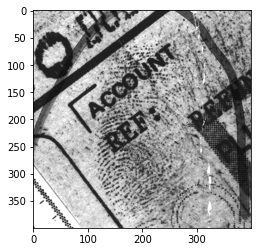

In [86]:
plt.imshow(fingerprint_img, cmap="gray")
plt.show()

In [87]:
fingerprint_hist = np.squeeze(cv2.calcHist([fingerprint_img], [0], None, [256], [0, 256]))

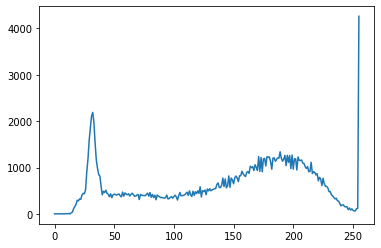

In [88]:
plt.plot(fingerprint_hist)
plt.show()

In [89]:
def make_mean_table(hist):
    K = hist.shape[0]
    mean_0 = np.zeros((K))
    mean_1 = np.zeros((K))
    n_0 = 0
    s_0 = 0
    n_1 = 0
    s_1 = 0
    for q in range(K):
        n_0 += hist[q]
        s_0 += (q*hist[q])
        mean_0[q] = s_0/n_0 if n_0>0 else -1
    N = int(n_0)
    q = K-2
    while q>=0:
        n_1 += hist[q+1]
        s_1 += ((q+1)*hist[q+1])
        mean_1[q] = s_1/n_1 if n_1>0 else -1
        q -= 1
    return mean_0, mean_1, N
    

In [90]:
test = np.array([3,4,5])
mean_0, mean_1, N = make_mean_table(test)

In [91]:
def otsu_threshold(hist):
    K = hist.shape[0]
    mean_0, mean_1, MN = make_mean_table(hist)
    var_b_max = 0 # var is never less than 0
    q_max = -1
    n_0 = 0
    for q in range(K-1):
        n_0 += hist[q]
        n_1 = MN-n_0
        if n_0>0 and n_1>0:
            var_b = (1/(MN**2))*n_0*n_1*((mean_0[q]-mean_1[q])**2)
            # print(var_b)
            if var_b > var_b_max:
                var_b_max = var_b
                q_max = q
    return q_max

In [92]:
q_max = otsu_threshold(fingerprint_hist)
print(q_max)

124


In [93]:
bin_img = np.zeros_like(fingerprint_img)
one_idx = np.where(fingerprint_img>q_max)
bin_img[one_idx[0], one_idx[1]] = 255

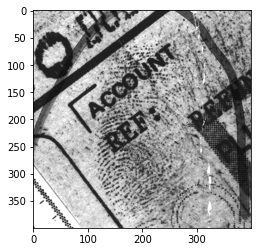

In [94]:
plt.imshow(fingerprint_img, cmap="gray")
plt.show()

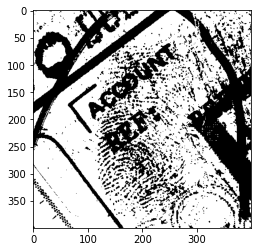

In [95]:
plt.imshow(bin_img, cmap="gray")
plt.show()

## Otsu Playground

In [126]:
img_link = r"D:\image_processing_practice\DIP_Java\imagingbook_images_de3\ch11\kepler.png"

In [127]:
def otsu_complete(img_link, adjust_img):
    img = plt.imread(img_link)
    if adjust_img == 1:
        img = (img*255).astype(np.uint8)
    plt.imshow(img, cmap="gray")
    plt.title("Original Picture")
    plt.show()
    img_hist = np.squeeze(cv2.calcHist([img], [0], None, [256], [0, 256]))
    plt.plot(img_hist)
    plt.show()
    q_max = otsu_threshold(img_hist)
    print(q_max)
    bin_img = np.zeros_like(img)
    one_idx = np.where(img>q_max)
    bin_img[one_idx[0], one_idx[1]] = 255
    plt.imshow(bin_img, cmap="gray")
    plt.show()  

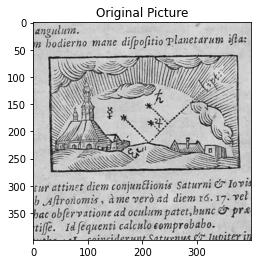

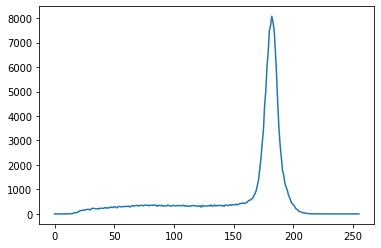

128


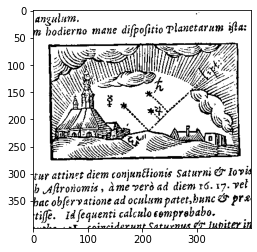

In [128]:
otsu_complete(img_link, 1)

In [129]:
def otsu_lib(img_link, adjust_img):
    img = plt.imread(img_link)
    if adjust_img == 1:
        img = (img*255).astype(np.uint8)
    plt.imshow(img, cmap="gray")
    plt.title("Original Picture")
    plt.show()
    q_max = skimage.filters.threshold_otsu(img)
    print(q_max)
    bin_img = np.zeros_like(img)
    one_idx = np.where(img>q_max)
    bin_img[one_idx[0], one_idx[1]] = 255
    plt.imshow(bin_img, cmap="gray")
    plt.show()  

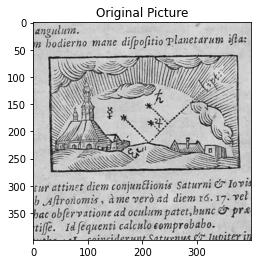

128


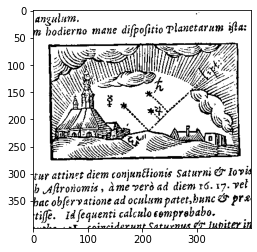

In [130]:
otsu_lib(img_link, 1)